In [2]:
library(dplyr)
library(ggplot2)
library(zoo)
library(forecast)
library(TSA)
library(uroot)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘TSA’

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar



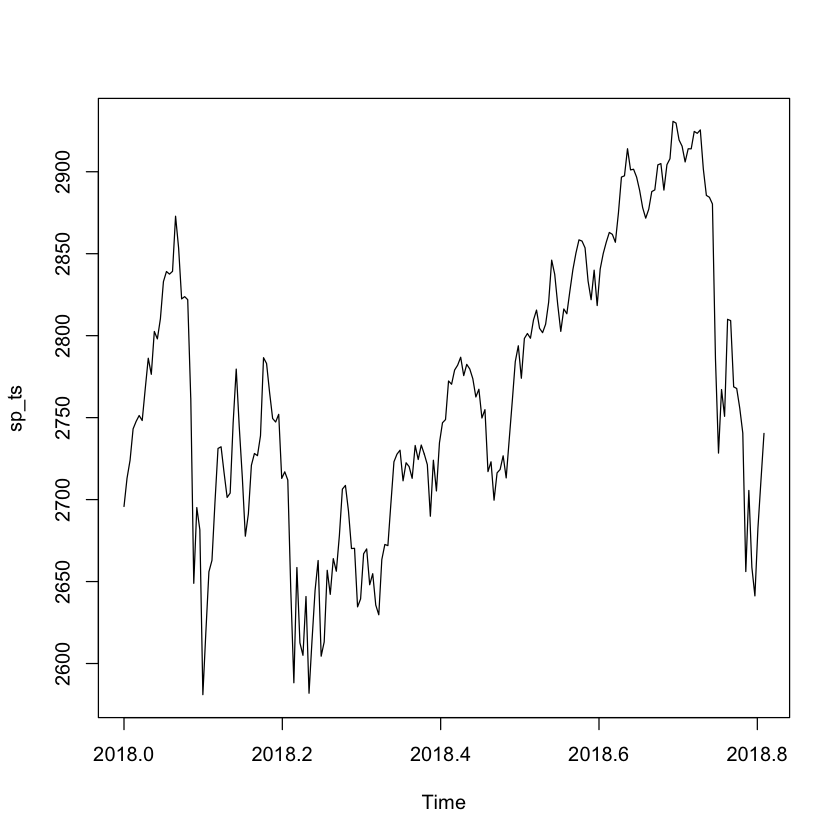

In [20]:
sp <- read.csv("GSPC.csv")
sp$Date <- as.Date(sp$Date, "%Y-%m-%d")
sp_ts <-ts(sp$Close, frequency=261, start=c(2018, 1, 1)) 
plot(sp_ts)

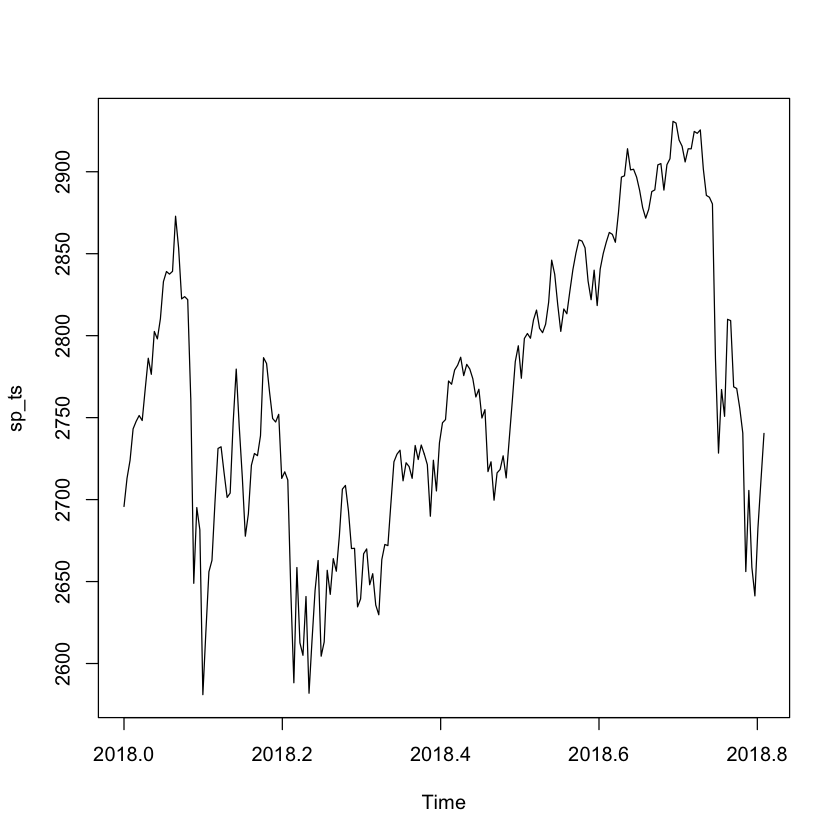

In [18]:
sp_ts <-ts(sp$Close, frequency=261, start=c(2018, 1, 1)) 
plot(sp_ts)

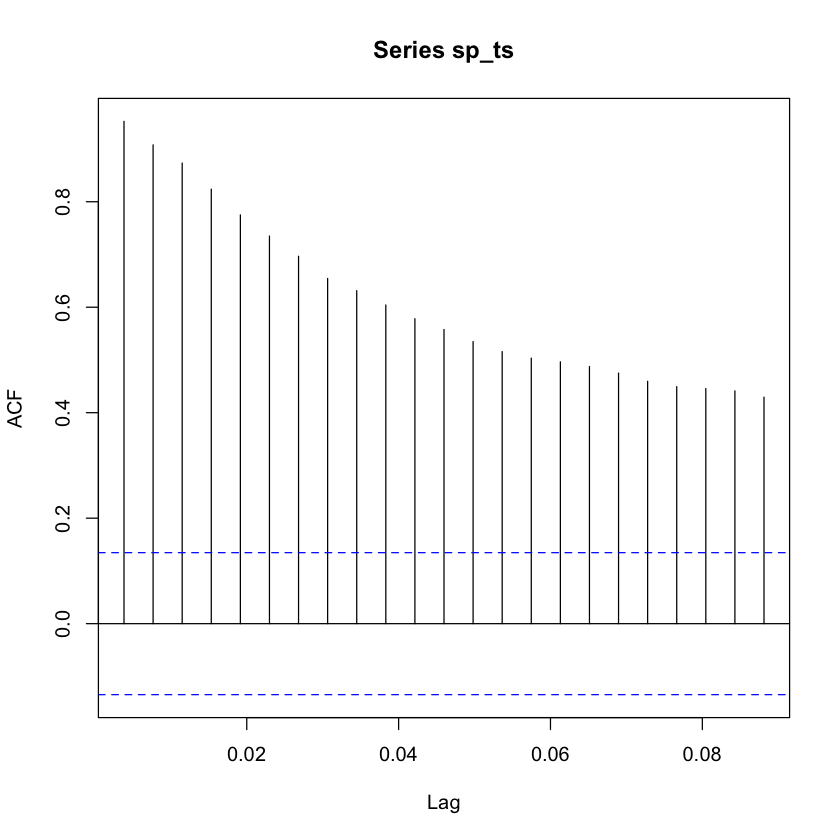

In [6]:
# Ploting acf for the data
acf(sp_ts)

In [7]:
sp_diff <- diff(sp_ts)

ACF clearly shows that our data is non-stationary, so we should figure out what model to use for our dataset. We will start with pacf

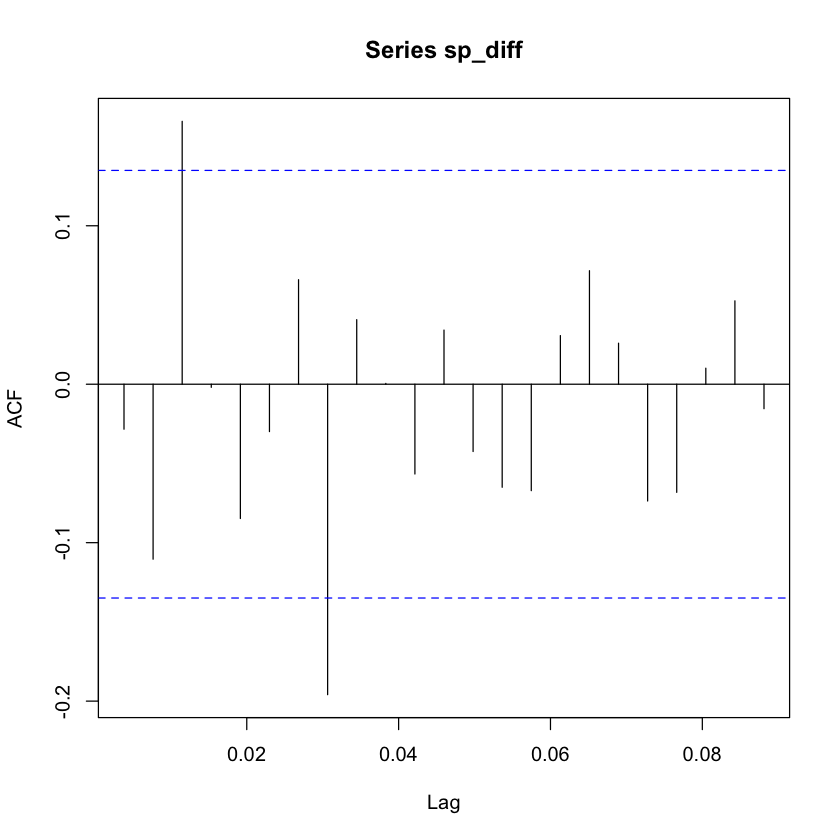

In [10]:
# ploting acf for our data
acf(sp_diff)

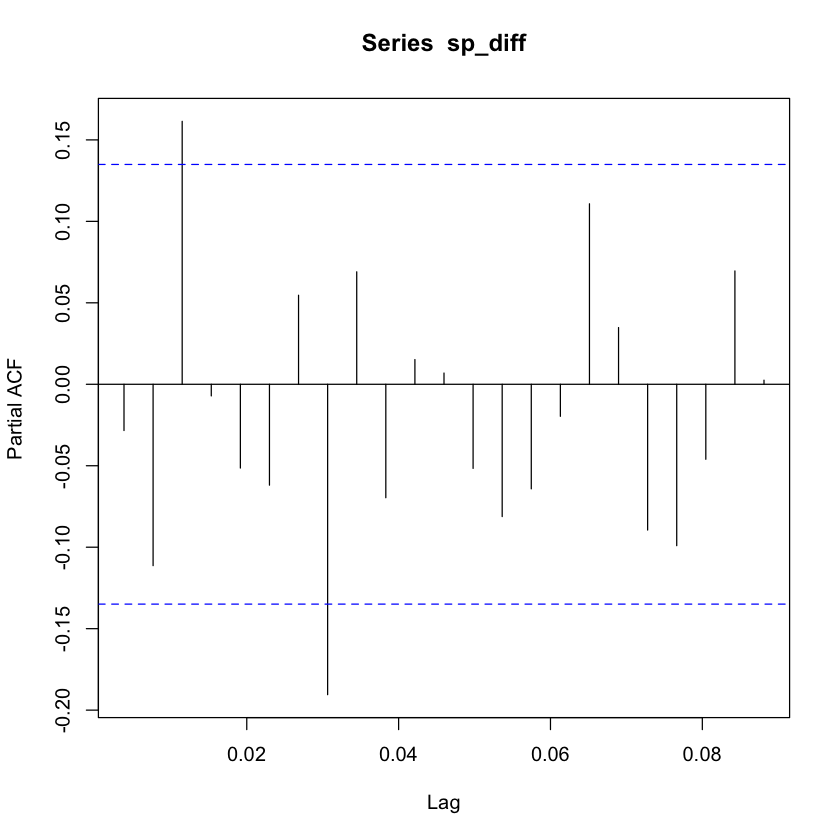

In [11]:
# ploting pacf for our data
pacf(sp_diff)

The above plot shows that an ar(3) or ar(8) model may work for our data

In [15]:
# ploting eacf 
eacf(sp_diff)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o x o o o o x o o o  o  o  o 
1 x o x o o o o x o o o  o  o  o 
2 x x o o o o o x o o o  o  o  o 
3 o x x o o o o x o o o  o  o  o 
4 o o x o o o o x o o o  o  o  o 
5 x x o o x o o x o o o  o  o  o 
6 x x x o x o o x o o o  o  o  o 
7 x x x o x o o o o o o  o  o  o 


Eacf does not mean too much in this case

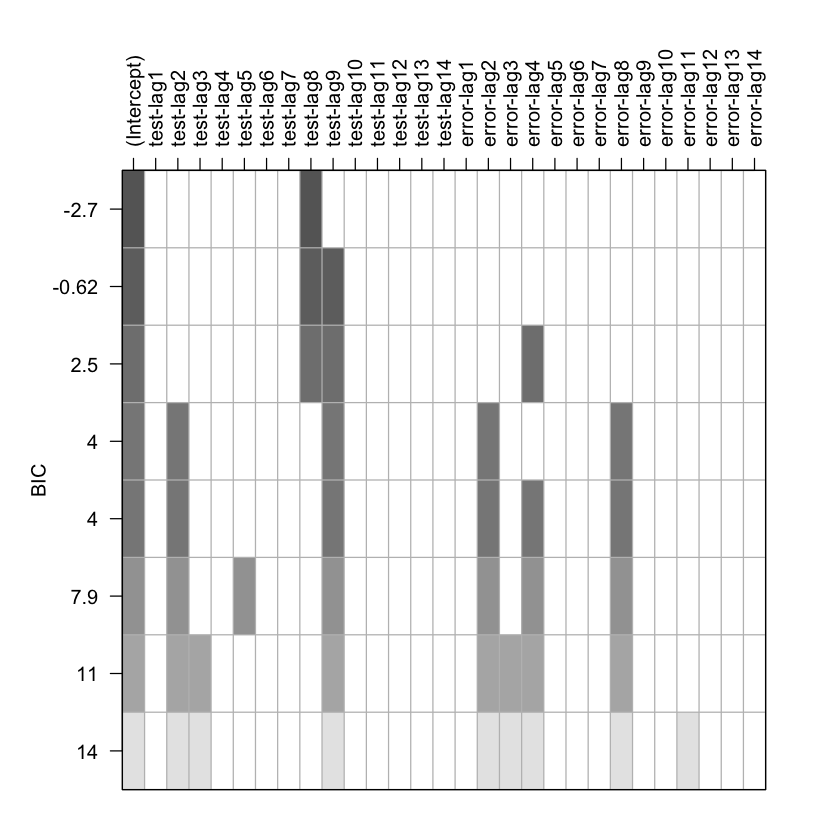

In [16]:
# plot BIC
plot(armasubsets(y=sp_diff,nar=14,nma=14,y.name='test',ar.method='ols'))

BIC plot also supports ar(1) model, so we will start from ar(1) model and detrend from there

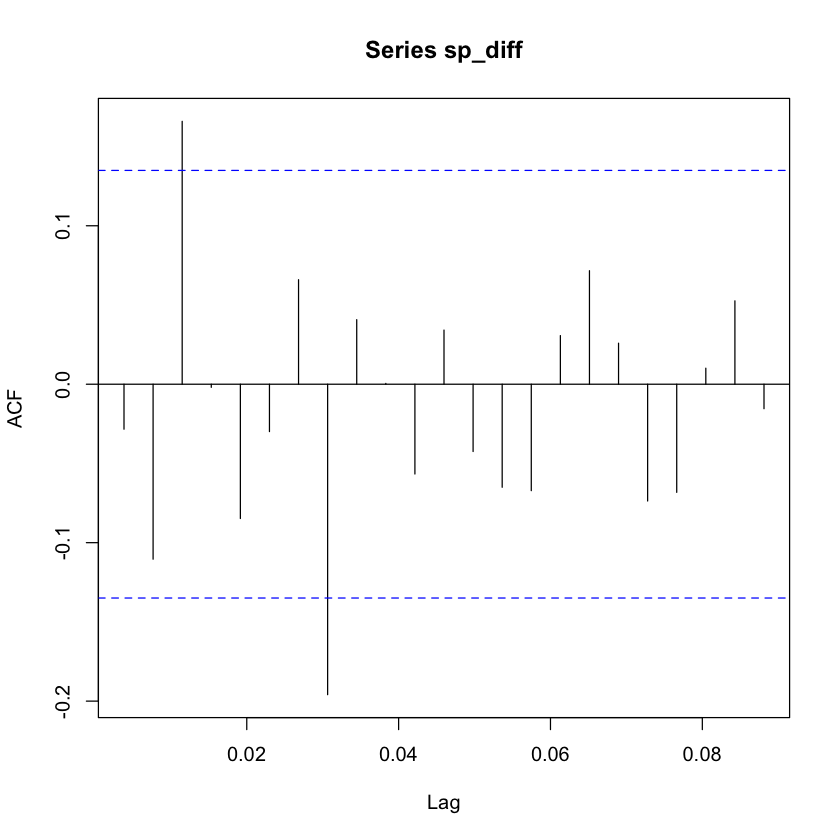

In [10]:
# plot acf for the first difference
acf(sp_diff)

ACF supports our hypothesis that the dataset is not stationary

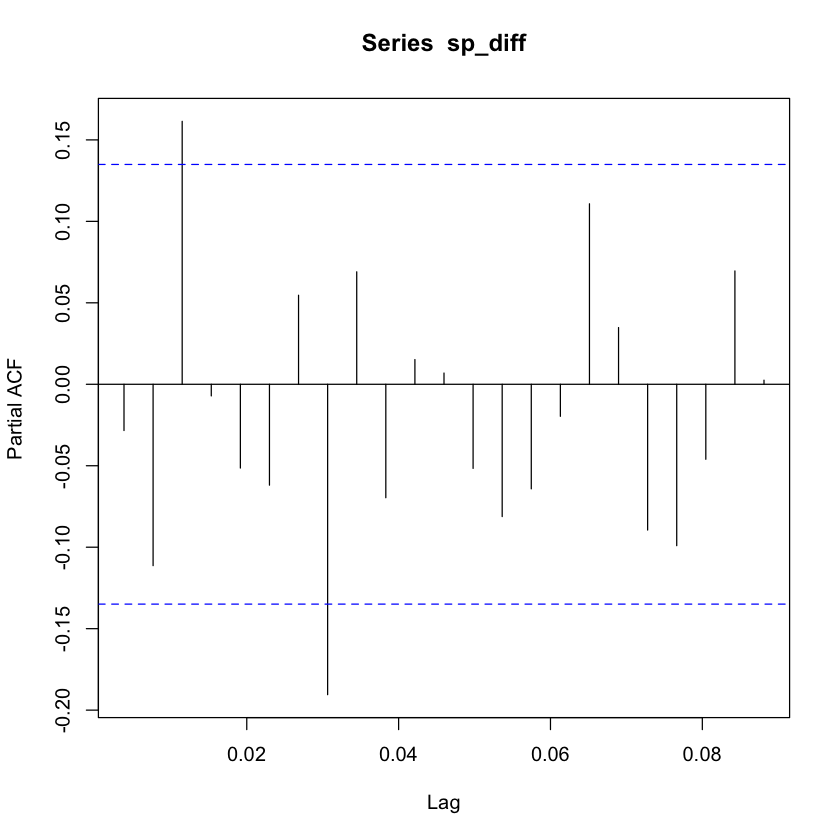

In [11]:
# plot pacf for the first difference
pacf(sp_diff)

In [12]:
# plot eacf for the first difference
eacf(sp_diff)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o x o o o o x o o o  o  o  o 
1 x o x o o o o x o o o  o  o  o 
2 x x o o o o o x o o o  o  o  o 
3 o x x o o o o x o o o  o  o  o 
4 o o x o o o o x o o o  o  o  o 
5 x x o o x o o x o o o  o  o  o 
6 x x x o x o o x o o o  o  o  o 
7 x x x o x o o o o o o  o  o  o 


PACF and EACF does not provide too much information as of what model to use for our data, so we will check the BIC again

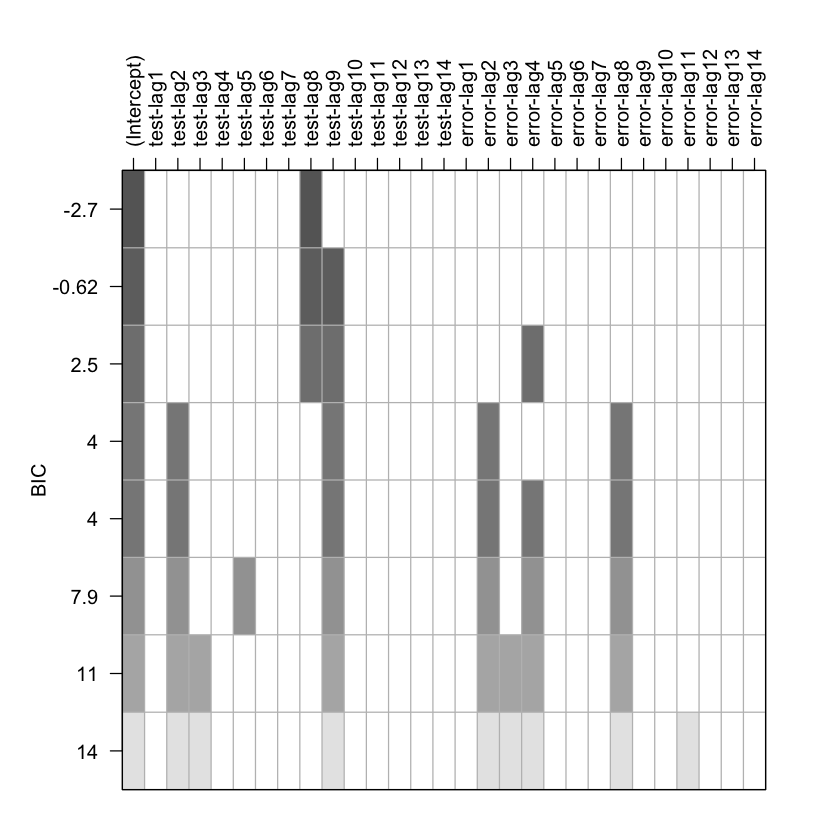

In [13]:
# plot BIC
plot(armasubsets(y=sp_diff,nar=14,nma=14,y.name='test',ar.method='ols'))

BIC suggests that we can use an ar(8) for the new dataset, since we already take the first difference, and plot shows some seasonality, we will try fit our new data with seasonality to be 8 rather than directly apply an ar(8) model

In [35]:
sp <- read.csv("GSPC.csv")
sp_500 <- ts(sp$Close, start=c(2018,01,01), freq=250)
sp_500 <- diff(sp$Close, differences=1)

# Fit our model using seasonality 8
set.seed(92397)
model <- arima(sp_500, order=c(0,0,0), seasonal=c(8,0,0))

In [30]:
# Calculate the residue for model diagonostic
res <- rstandard(model)

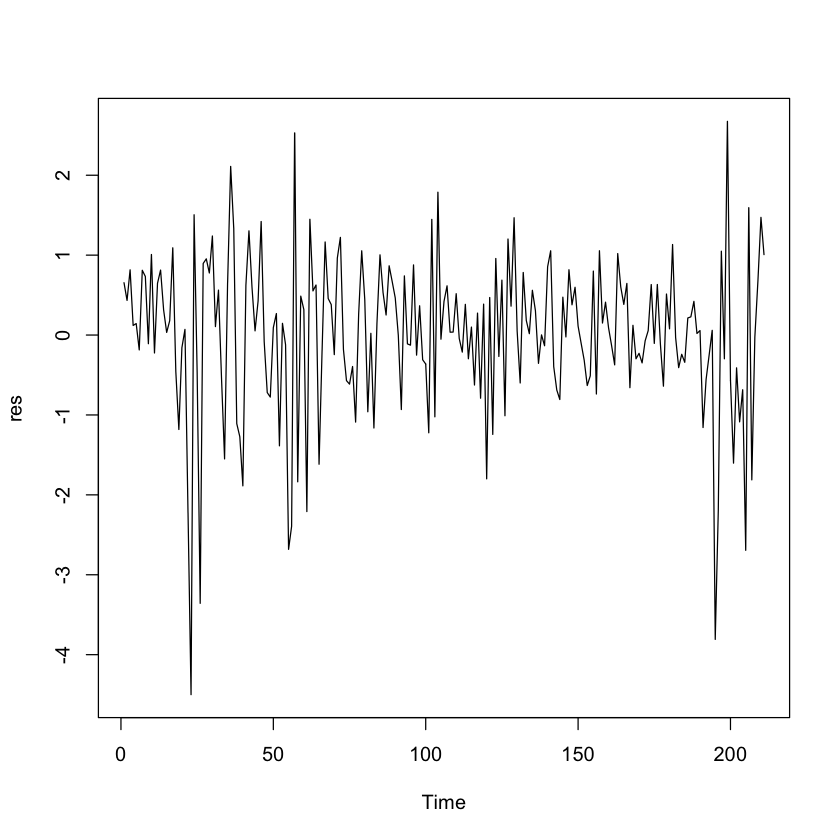

In [31]:
plot(res)

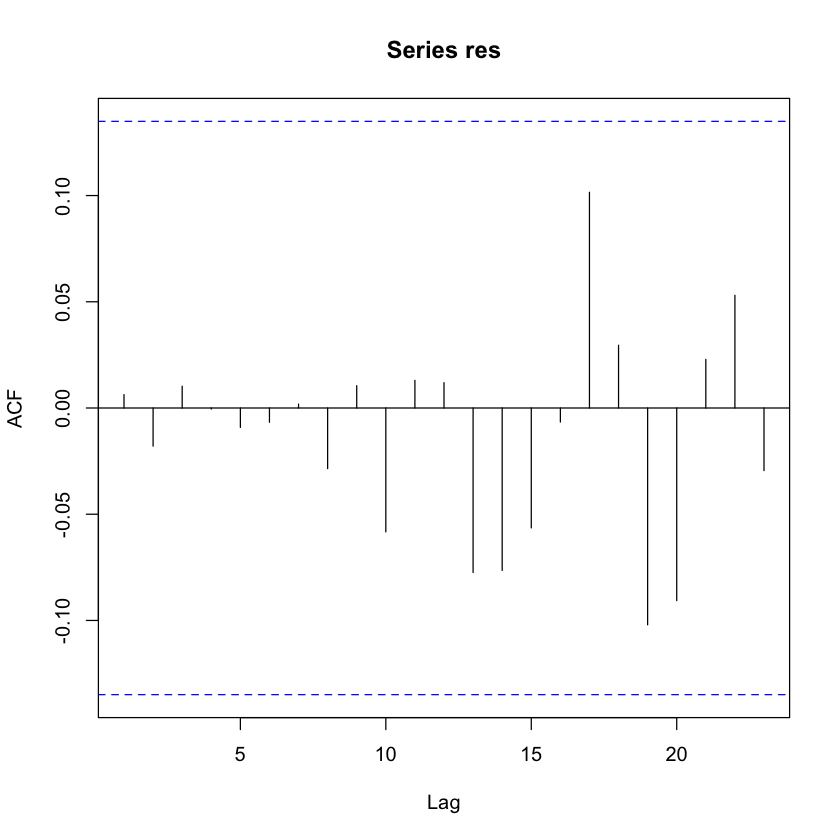

In [32]:
acf(res)

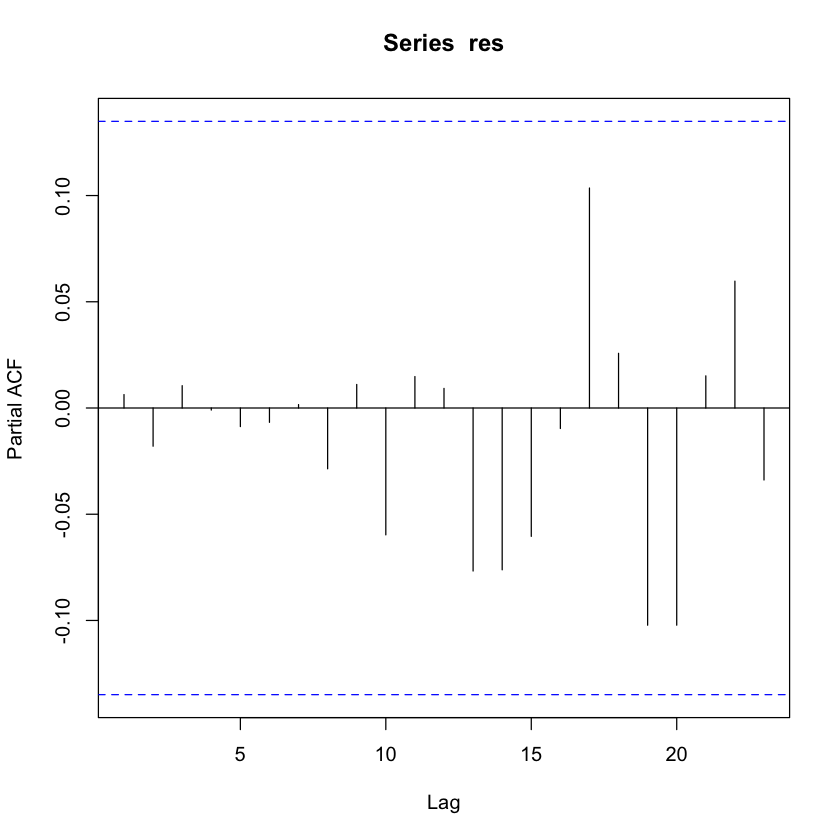

In [33]:
pacf(res)